In [1]:
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
import cv2 as cv
import os
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.optimizers import Nadam



In [2]:
img=image.load_img("C:/Users/abhay/Documents/Internship_mass_technologiesss/TASK4/training/covid-positive/1052b0fe.jpg")

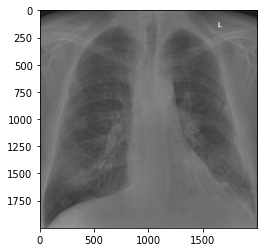

In [3]:
plt.imshow(img)

In [4]:
cv.imread("C:/Users/abhay/Documents/Internship_mass_technologiesss/TASK4/training/covid-positive/1052b0fe.jpg").shape

(2000, 2000, 3)

In [5]:
train=ImageDataGenerator(rescale=1/255)
validation=ImageDataGenerator(rescale=1/255)

In [6]:
train_dataset=train.flow_from_directory('training/',target_size=(200,200),batch_size=3,class_mode='binary')
validation_dataset=validation.flow_from_directory('validation/',target_size=(200,200),batch_size=3,class_mode='binary')

Found 2268 images belonging to 2 classes.
Found 932 images belonging to 2 classes.


In [7]:
train_dataset.class_indices

{'covid-negative': 0, 'covid-positive': 1}

1.  First, we create a Keras Sequential Model and create a Convolution layer with 16 feature maps at size (3,3)
2.  Relu is the activation is used and later we downsample the data by using the MaxPooling technique.
3.  We further scale down the image by passing it through the second Convolution layer with 32 feature maps. This process is called Feature Extraction. 
4. Once feature extraction is done, we can flatten the data into a single vector and feed them to hidden dense layer
5. The softmax activation/sigmoid  is used at the output layer to make sure these outputs are of categorical data type which is helpful for Image Classification.

In [12]:
model=tf.keras.models.Sequential([
     # first convolution layer
    tf.keras.layers.Conv2D(16,(3,3),activation='relu',input_shape=(200,200,3)),
    tf.keras.layers.MaxPool2D(2,2),
     # second convolution layer
    tf.keras.layers.Conv2D(32,(3,3),activation='relu'),
    tf.keras.layers.MaxPool2D(2,2),
     # third convolution layer
    tf.keras.layers.Conv2D(16,(3,3),activation='relu'),
    tf.keras.layers.MaxPool2D(2,2),
    
    tf.keras.layers.Flatten(), #making a 1D array of elements
    
    #Hidden layer and output layer
    tf.keras.layers.Dense(512,activation='relu'),
    tf.keras.layers.Dense(1,activation='sigmoid')
])
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 198, 198, 16)      448       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 99, 99, 16)       0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 97, 97, 32)        4640      
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 48, 48, 32)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 46, 46, 16)        4624      
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 23, 23, 16)      

# Compilation

In [9]:
#for binary classification
model.compile(loss='binary_crossentropy', #CategoricalCrossentropy class
                optimizer=RMSprop(learning_rate=0.001),  #An optimizer is a function or an algorithm that modifies the attributes of the neural network, such as weights and learning rate. Thus, it helps in reducing the overall loss and improve the accuracy
              metrics=['accuracy']
             )

In [10]:
model_fit=model.fit(train_dataset,steps_per_epoch=5,epochs=20,validation_data=validation_dataset) #Steps_per_epoch=#train_length // batch_size

Epoch 1/20
5/5 [==============================] - 26s 6s/step - loss: 3.1295 - accuracy: 0.7333 - val_loss: 2.3260 - val_accuracy: 0.2607
Epoch 2/20
5/5 [==============================] - 20s 5s/step - loss: 0.8207 - accuracy: 0.7333 - val_loss: 1.7761 - val_accuracy: 0.2607
Epoch 3/20
5/5 [==============================] - 22s 5s/step - loss: 0.6163 - accuracy: 0.6000 - val_loss: 0.4863 - val_accuracy: 0.7500
Epoch 4/20
5/5 [==============================] - 22s 5s/step - loss: 0.5442 - accuracy: 0.7333 - val_loss: 0.5451 - val_accuracy: 0.8208
Epoch 5/20
5/5 [==============================] - 20s 5s/step - loss: 0.9431 - accuracy: 0.6000 - val_loss: 0.6292 - val_accuracy: 0.6416
Epoch 6/20
5/5 [==============================] - 20s 5s/step - loss: 0.5234 - accuracy: 0.6667 - val_loss: 0.5951 - val_accuracy: 0.6964
Epoch 7/20
5/5 [==============================] - 20s 5s/step - loss: 0.6647 - accuracy: 0.6000 - val_loss: 0.3148 - val_accuracy: 0.9281
Epoch 8/20
5/5 [==================

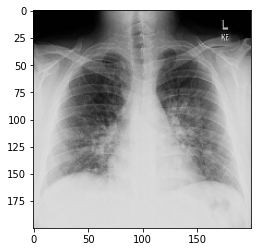

Covid Positive


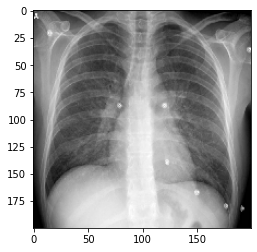

Covid Positive


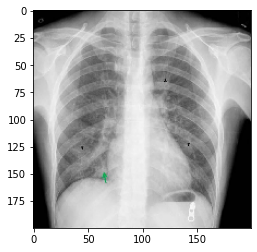

Covid Positive


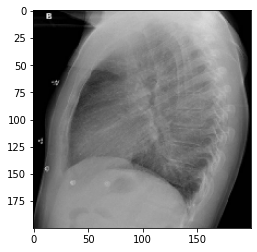

Covid Positive


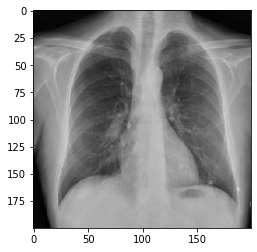

Covid Positive


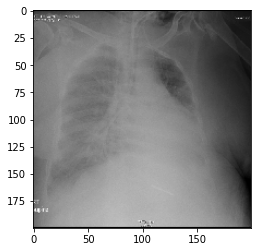

Covid Positive


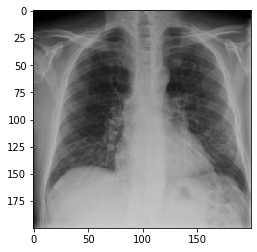

Covid Positive


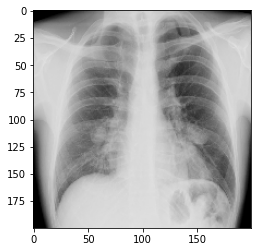

Covid Positive


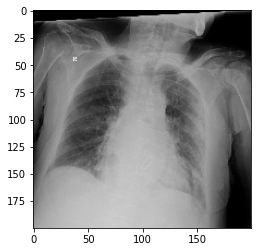

Covid Positive


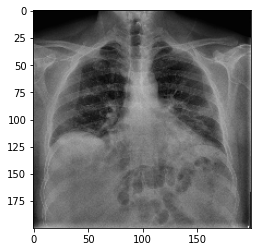

Covid Positive


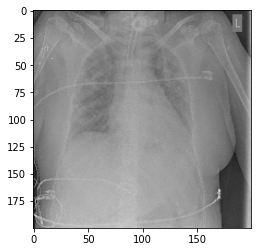

Covid Positive


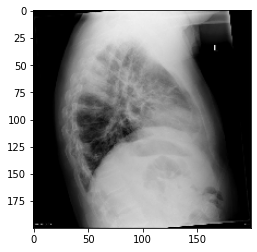

Covid Positive


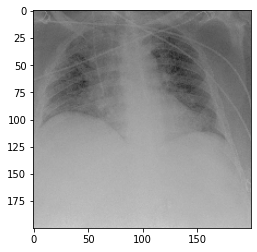

Covid Positive


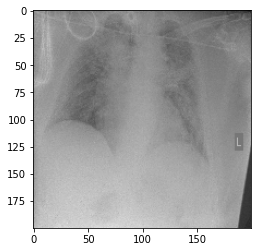

Covid Positive


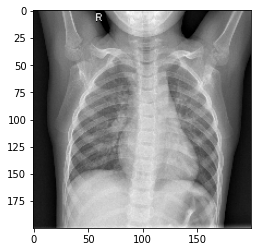

Covid Negative


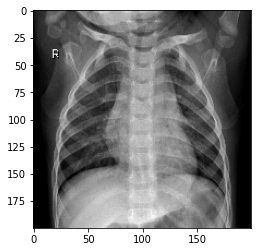

Covid Negative


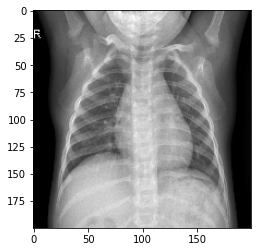

Covid Negative


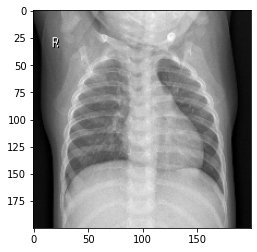

Covid Negative


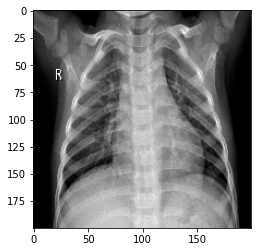

Covid Negative


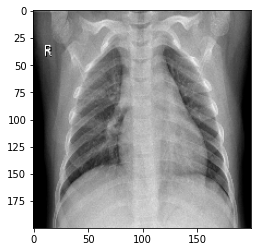

Covid Negative


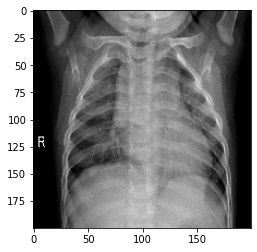

Covid Negative


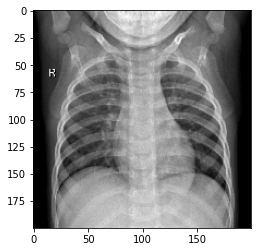

Covid Negative


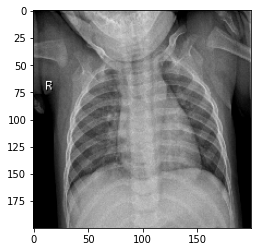

Covid Negative


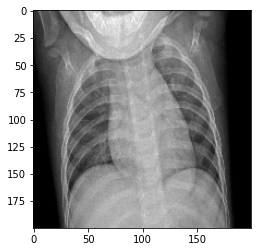

Covid Negative


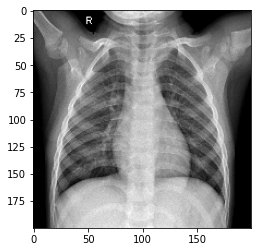

Covid Negative


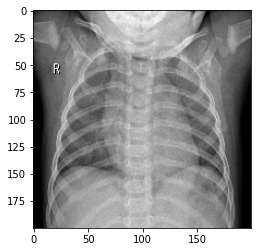

Covid Negative


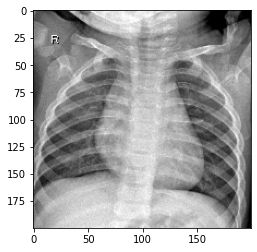

Covid Positive


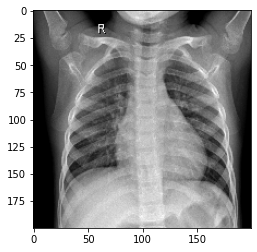

Covid Negative


In [11]:
dir_path='testing/'

for i in os.listdir(dir_path):
    img=image.load_img(dir_path+'//'+i,target_size=(200,200))
    plt.imshow(img)
    plt.show()

    X=image.img_to_array(img)
    X=np.expand_dims(X,axis=0)  #https://numpy.org/doc/stable/reference/generated/numpy.expand_dims.html
    images=np.vstack([X])
    val= model.predict(images)
    if val==0:
        print("Covid Negative")
        
    else:
        print("Covid Positive")